In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_FILE, HISTORICAL_DB_KEEP_OUT, RESOURCE_DIR, IMAGES_DIR

In [38]:
df = pd.read_excel(HISTORICAL_FILE, keep_default_na=False)
#reads projects from Excel file

len(df)
df.head()

,OWNER,PROJECTS,COMMITS,DATE COMMIT,MySQL_Maria DB,PostgreSQL_ CockroachDB,H2,Oracle,HyperSQL,Redis,...,Singlestore,Aerospike,CouchDB,Virtuoso-NoSql,Ignite-Sql,Virtuoso,Impala,Riak KV,Realm,Microsoft Azure Table Storage
0,Activiti,Activiti,1,2010-07-08 12:23:23+00:00,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Activiti,Activiti,2,2010-07-29 07:38:01+00:00,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Activiti,Activiti,3,2010-08-26 14:46:26+00:00,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Activiti,Activiti,4,2010-09-10 13:23:04+00:00,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Activiti,Activiti,5,2010-09-21 20:47:55+00:00,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Combining the heuristics of Multimodel DBs (Ignite and Virtuoso)

In [39]:
df["Join_Ignite-Sql"] = df["Ignite"] +  df["Ignite-Sql"]
df["Join_Ignite-NoSql"] = df["Ignite"] +  df["Ignite-NoSql"]
#df["Join_MarkLogic-Sql"] = df["MarkLogic"] +  df["MarkLogic-Sql"]
#df["Join_MarkLogic-NoSql"] = df["MarkLogic"] +  df["MarkLogic-NoSql"]
df["Join_Virtuoso-Sql"] = df["Virtuoso"] #+  df["Virtuoso-Sql"] (Não virtuoso SQL como resultado)
df["Join_Virtuoso-NoSql"] = df["Virtuoso"] +  df["Virtuoso-NoSql"]

df.rename(columns={'MySQL_Maria DB': 'MySQL'}, inplace=True)
df.rename(columns={'PostgreSQL_ CockroachDB': 'PostgreSQL'}, inplace=True)
df.rename(columns={'MS SQL Server_Microsoft Azure SQL Database': 'MS SQL Server'}, inplace=True)
#df.rename(columns={'Join_Ignite-Sql': 'Ignite-Sql'}, inplace=True)
#df.rename(columns={'Join_Ignite-NoSql': 'Ignite-NoSql'}, inplace=True)


df

,OWNER,PROJECTS,COMMITS,DATE COMMIT,MySQL,PostgreSQL,H2,Oracle,HyperSQL,Redis,...,Ignite-Sql,Virtuoso,Impala,Riak KV,Realm,Microsoft Azure Table Storage,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,Activiti,1,2010-07-08 12:23:23+00:00,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Activiti,Activiti,2,2010-07-29 07:38:01+00:00,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Activiti,Activiti,3,2010-08-26 14:46:26+00:00,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Activiti,Activiti,4,2010-09-10 13:23:04+00:00,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Activiti,Activiti,5,2010-09-21 20:47:55+00:00,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,RoaringBitmap,RoaringBitmap,20,2020-04-25 02:32:30+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48742,RoaringBitmap,RoaringBitmap,21,2021-04-07 15:26:40+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48743,RoaringBitmap,RoaringBitmap,22,2021-11-06 23:14:29+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48744,RoaringBitmap,RoaringBitmap,23,2022-11-14 22:27:49+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Deleting the heuristics of the Bd Multimodels that were alone 

In [40]:
df2 = df

df2.drop(["Ignite", "Ignite-Sql","Ignite-NoSql", #"MarkLogic","MarkLogic-Sql","MarkLogic-NoSql", 
          "Virtuoso","Virtuoso-NoSql"], axis=1, inplace=True)
df2

,OWNER,PROJECTS,COMMITS,DATE COMMIT,MySQL,PostgreSQL,H2,Oracle,HyperSQL,Redis,...,Aerospike,CouchDB,Impala,Riak KV,Realm,Microsoft Azure Table Storage,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,Activiti,1,2010-07-08 12:23:23+00:00,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Activiti,Activiti,2,2010-07-29 07:38:01+00:00,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Activiti,Activiti,3,2010-08-26 14:46:26+00:00,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Activiti,Activiti,4,2010-09-10 13:23:04+00:00,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Activiti,Activiti,5,2010-09-21 20:47:55+00:00,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,RoaringBitmap,RoaringBitmap,20,2020-04-25 02:32:30+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48742,RoaringBitmap,RoaringBitmap,21,2021-04-07 15:26:40+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48743,RoaringBitmap,RoaringBitmap,22,2021-11-06 23:14:29+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48744,RoaringBitmap,RoaringBitmap,23,2022-11-14 22:27:49+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Renaming the Multimodel DB heuristics 

In [7]:
df2['Join_Ignite-Sql']= df2['Join_Ignite-Sql'].replace([2,1],[1,0])
df2['Join_Ignite-NoSql']= df2['Join_Ignite-NoSql'].replace([2,1],[1,0])
#df2['Join_MarkLogic-Sql']= df2['Join_MarkLogic-Sql'].replace([2,1],[1,0])
#df2['Join_MarkLogic-NoSql']= df2['Join_MarkLogic-NoSql'].replace([2,1],[1,0])
df2['Join_Virtuoso-Sql']= df2['Join_Virtuoso-Sql'].replace([2,1],[1,0])
df2['Join_Virtuoso-NoSql']= df2['Join_Virtuoso-Sql'].replace([2,1],[1,0])
df2

,OWNER,PROJECTS,COMMITS,DATE COMMIT,MySQL,PostgreSQL,H2,Oracle,HyperSQL,Redis,...,Aerospike,CouchDB,Impala,Riak KV,Realm,Microsoft Azure Table Storage,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,Activiti,1,2010-07-08 12:23:23+00:00,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Activiti,Activiti,2,2010-07-29 07:38:01+00:00,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Activiti,Activiti,3,2010-08-26 14:46:26+00:00,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Activiti,Activiti,4,2010-09-10 13:23:04+00:00,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Activiti,Activiti,5,2010-09-21 20:47:55+00:00,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,RoaringBitmap,RoaringBitmap,20,2020-04-25 02:32:30+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48742,RoaringBitmap,RoaringBitmap,21,2021-04-07 15:26:40+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48743,RoaringBitmap,RoaringBitmap,22,2021-11-06 23:14:29+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48744,RoaringBitmap,RoaringBitmap,23,2022-11-14 22:27:49+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Generating the file with all the BD heuristics including the Multimodel BD combinations 

In [41]:
HISTORICAL_FILE_JOIN = RESOURCE_DIR + os.sep + 'historical_join.xlsx'
df.to_excel(HISTORICAL_FILE_JOIN, index=False)
#df2 = df2.to_excel("historical_join.xlsx", index=False)

In [42]:
df

,OWNER,PROJECTS,COMMITS,DATE COMMIT,MySQL,PostgreSQL,H2,Oracle,HyperSQL,Redis,...,Aerospike,CouchDB,Impala,Riak KV,Realm,Microsoft Azure Table Storage,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,Activiti,1,2010-07-08 12:23:23+00:00,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Activiti,Activiti,2,2010-07-29 07:38:01+00:00,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Activiti,Activiti,3,2010-08-26 14:46:26+00:00,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Activiti,Activiti,4,2010-09-10 13:23:04+00:00,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Activiti,Activiti,5,2010-09-21 20:47:55+00:00,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,RoaringBitmap,RoaringBitmap,20,2020-04-25 02:32:30+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48742,RoaringBitmap,RoaringBitmap,21,2021-04-07 15:26:40+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48743,RoaringBitmap,RoaringBitmap,22,2021-11-06 23:14:29+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48744,RoaringBitmap,RoaringBitmap,23,2022-11-14 22:27:49+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Number of commits that showed evidence of use by database

In [43]:
#df
df = df.drop(columns=['DATE COMMIT'])
df.iloc[: , 2:].sum().sort_values(ascending=False)

COMMITS                          9558392
MySQL                              17698
PostgreSQL                         14415
H2                                 12480
Oracle                             12446
HyperSQL                           10461
Redis                              10244
MongoDB                             7431
MS SQL Server                       7207
DynamoDB                            6045
Google Cloud Datastore              6037
Cassandra                           5759
HBase                               4677
IBM DB2                             4354
Hazelcast                           4260
SQLite                              4103
SAP SQL Anywhere                    2792
MarkLogic                           2603
SAP Adaptive Server                 2563
Neo4j                               2423
Join_Ignite-NoSql                   2374
Informix                            2339
ClickHouse                          2126
Firebird                            1869
Couchbase       

In [44]:
#Teste para encontrar repos com o mesmo nome
#dfnomes = df['PROJECTS'].unique()
#dfnomes = pd.DataFrame(data=dfnomes)
#dfnomes
#dfnomes.to_excel('nomes_historical_join_new.xlsx', index=False)
selecao = df['PROJECTS'].str.startswith('android')
dfteste = df[selecao]
dfteste
#dfnomes.merge(df, on=['PROJECTS'], how='outer', suffixes=['', '_'], indicator=True)
#dfnomes
#dfnomes.merge(df, on=['PROJECTS'], how='outer', suffixes=['', '_'], indicator=True)
#dfnomes
#df_mer= pd.merge(dfnomes, df, on= 'PROJECTS', how='outer', suffixes=['', '_'], indicator=True)
#df_mer
#df_mer.to_excel('compara_nomes_projects.xlsx',index=True)
#duplicados = df.duplicated()
#duplicados.sum()
#dfnomes = pd.DataFrame(data=duplicados)

,OWNER,PROJECTS,COMMITS,MySQL,PostgreSQL,H2,Oracle,HyperSQL,Redis,MongoDB,...,Aerospike,CouchDB,Impala,Riak KV,Realm,Microsoft Azure Table Storage,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
813,AltBeacon,android-beacon-library,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
814,AltBeacon,android-beacon-library,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
815,AltBeacon,android-beacon-library,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
816,AltBeacon,android-beacon-library,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
817,AltBeacon,android-beacon-library,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39830,simpligility,android-maven-plugin,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39831,simpligility,android-maven-plugin,25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39832,simpligility,android-maven-plugin,26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39833,simpligility,android-maven-plugin,27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df2 = df.groupby("PROJECTS").sum()
#df2 = df["COMMITS"].sum().sort_values(ascending=False)
#df2.iloc[: , 1:] => para ocultar a linha COMMITS
df3 = df2.iloc[: , 1:]
df4 = df3.T
df4

PROJECTS,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,AndroidUtilCode,AntennaPod,AnySoftKeyboard,Apktool,ArchUnit,AsciidocFX,AxonFramework,...,wildfly,xxl-job,yacy_search_server,zaproxy,zeppelin,zipkin,zookeeper,zotfile,zxing,zxing-android-embedded
MySQL,81,0,0,0,0,0,0,0,2,117,...,381,17,136,67,53,44,6,0,0,0
PostgreSQL,81,0,0,0,0,0,0,0,2,97,...,322,0,136,0,56,10,0,0,0,0
H2,112,0,0,0,0,0,0,0,0,0,...,418,0,0,0,48,10,0,0,0,0
Oracle,75,0,0,0,0,0,0,0,0,93,...,322,0,0,55,0,0,0,0,0,0
HyperSQL,31,0,0,0,0,0,0,0,0,117,...,387,0,0,107,0,0,0,0,0,0
Redis,0,0,0,1,0,0,0,0,0,16,...,0,1,0,0,53,0,0,0,0,0
MongoDB,0,0,0,0,0,0,0,0,0,50,...,0,0,0,0,31,1,0,0,0,0
MS SQL Server,49,0,0,0,0,0,0,0,2,0,...,322,0,0,0,5,0,0,0,0,0
DynamoDB,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Google Cloud Datastore,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,66,0,0,0,0,0


Number of Projects in which there was evidence of use by Database 

In [46]:
def num_missing(x):
   return sum(x >= 1)
#df2.apply(num_missing, axis=0).sort_values(ascending=False)
#without COMMITS
df2.iloc[: , 1:].apply(num_missing, axis=0).sort_values(ascending=False)

MySQL                            144
H2                               118
PostgreSQL                       105
Oracle                            99
Redis                             99
HyperSQL                          84
MS SQL Server                     68
MongoDB                           54
Google Cloud Datastore            51
SQLite                            42
IBM DB2                           41
Hazelcast                         38
DynamoDB                          38
Cassandra                         33
HBase                             28
SAP SQL Anywhere                  24
SAP Adaptive Server               23
Neo4j                             20
MarkLogic                         15
Informix                          15
MS Access                         14
Firebird                          13
Firebase Realtime                 11
SapHana                           11
Teradata                          11
ClickHouse                        11
Couchbase                         10
P

In [47]:
df4['SumperDatabase'] = df2.iloc[: , 1:].apply(num_missing, axis=0).sort_values(ascending=False)
df4

PROJECTS,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,AndroidUtilCode,AntennaPod,AnySoftKeyboard,Apktool,ArchUnit,AsciidocFX,AxonFramework,...,xxl-job,yacy_search_server,zaproxy,zeppelin,zipkin,zookeeper,zotfile,zxing,zxing-android-embedded,SumperDatabase
MySQL,81,0,0,0,0,0,0,0,2,117,...,17,136,67,53,44,6,0,0,0,144
PostgreSQL,81,0,0,0,0,0,0,0,2,97,...,0,136,0,56,10,0,0,0,0,105
H2,112,0,0,0,0,0,0,0,0,0,...,0,0,0,48,10,0,0,0,0,118
Oracle,75,0,0,0,0,0,0,0,0,93,...,0,0,55,0,0,0,0,0,0,99
HyperSQL,31,0,0,0,0,0,0,0,0,117,...,0,0,107,0,0,0,0,0,0,84
Redis,0,0,0,1,0,0,0,0,0,16,...,1,0,0,53,0,0,0,0,0,99
MongoDB,0,0,0,0,0,0,0,0,0,50,...,0,0,0,31,1,0,0,0,0,54
MS SQL Server,49,0,0,0,0,0,0,0,2,0,...,0,0,0,5,0,0,0,0,0,68
DynamoDB,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
Google Cloud Datastore,0,0,0,0,0,0,0,0,1,0,...,0,0,0,66,0,0,0,0,0,51


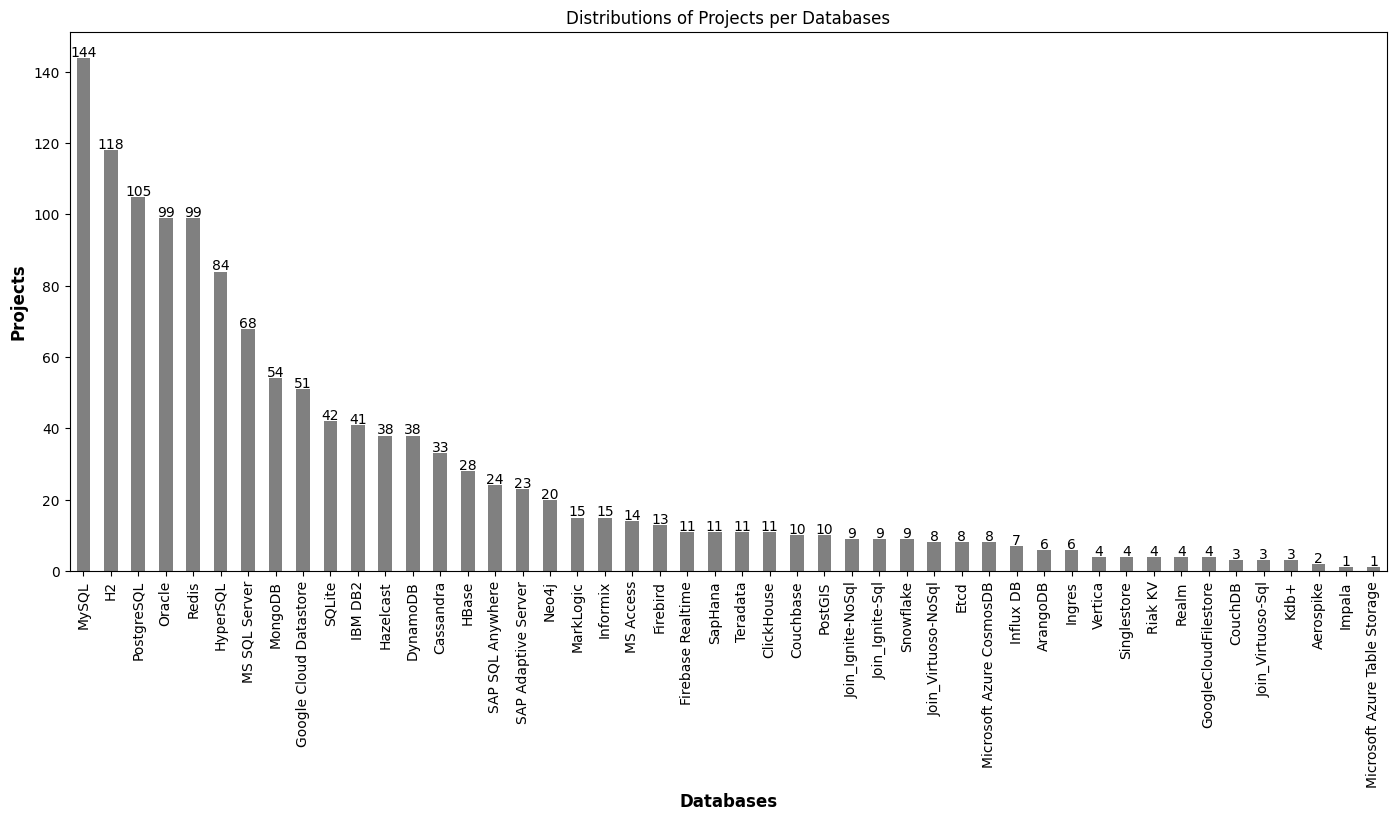

In [48]:
plt.figure(figsize=(17,7))
plot = df2.iloc[: , 1:].apply(num_missing, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects per Databases', color='gray')
plt.xlabel("Databases", fontsize=12, fontweight='bold')
plt.ylabel("Projects", fontsize=12,fontweight='bold' )



#plt.show() 
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')


#plt.savefig(IMAGES_DIR+"/fig9.pdf", format="pdf", bbox_inches="tight")

Number of Projects in which there was indication of use in all versions of the project by Database

In [16]:
def full_commits(x):
   return sum(x == 10)
df2.iloc[: , 1:].apply(full_commits, axis=0).sort_values(ascending=False)
#este código não está correto, cada projeto tem uma quantidade de slices. Precisa ser adaptado.

MySQL                            3
Cassandra                        2
Oracle                           2
Hazelcast                        2
Google Cloud Datastore           2
MS Access                        1
PostgreSQL                       1
Aerospike                        1
MarkLogic                        1
Microsoft Azure Table Storage    1
PostGIS                          1
DynamoDB                         1
H2                               1
Redis                            1
Etcd                             0
Firebase Realtime                0
ArangoDB                         0
Join_Virtuoso-Sql                0
Microsoft Azure CosmosDB         0
Vertica                          0
Kdb+                             0
Realm                            0
Singlestore                      0
CouchDB                          0
Join_Ignite-NoSql                0
Impala                           0
GoogleCloudFilestore             0
Join_Ignite-Sql                  0
Riak KV             

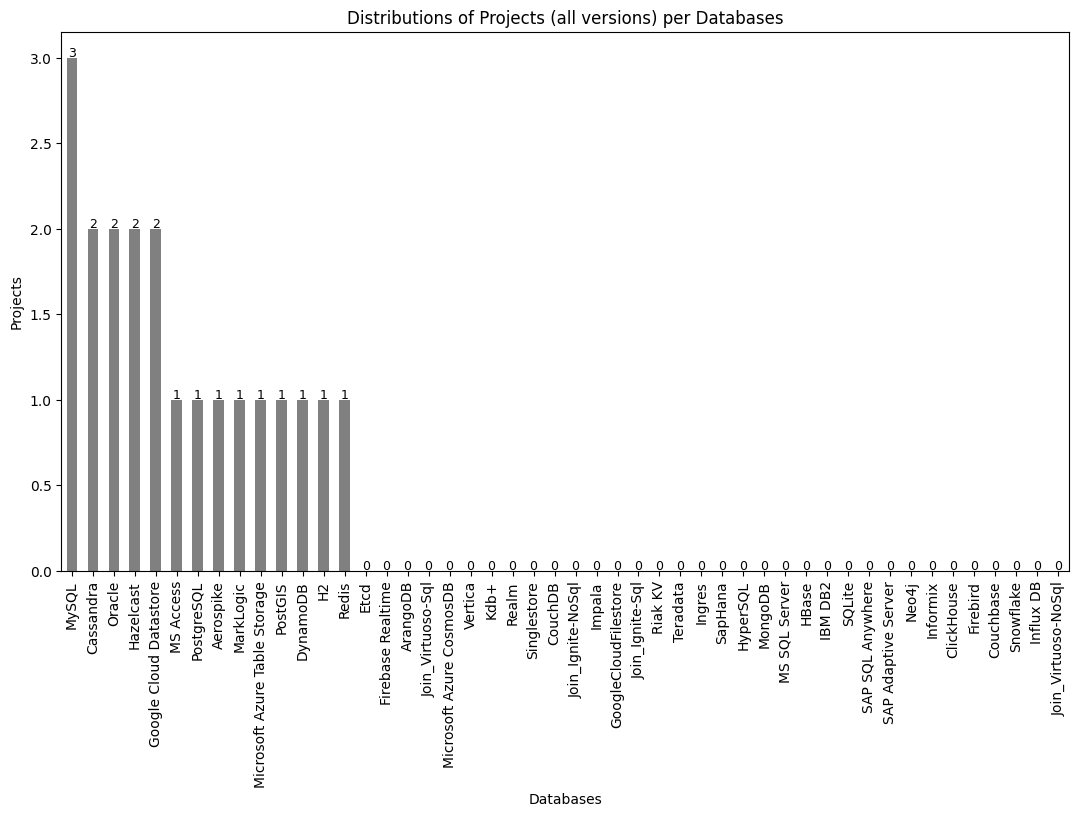

In [17]:
plt.figure(figsize=(13,7))
plot = df2.iloc[: , 1:].apply(full_commits, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects (all versions) per Databases', color='gray')
plt.xlabel("Databases")
plt.ylabel("Projects")
#plt.show()
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 1),textcoords='offset points')

Number of Projects in which there was an indication of use in some of the versions of projects by Database

In [49]:
def less_commits(x):
   #return sum(x/10)
   return sum(x % 10 != 0 )
df2.iloc[: , 1:].apply(less_commits, axis=0).sort_values(ascending=False)

MySQL                            128
H2                               109
PostgreSQL                        98
Redis                             93
Oracle                            91
HyperSQL                          81
MS SQL Server                     67
MongoDB                           47
Google Cloud Datastore            45
SQLite                            40
IBM DB2                           38
DynamoDB                          35
Hazelcast                         35
Cassandra                         29
HBase                             25
SAP SQL Anywhere                  23
SAP Adaptive Server               22
Neo4j                             18
Informix                          15
MarkLogic                         14
MS Access                         13
Firebird                          13
Teradata                          11
ClickHouse                        10
Firebase Realtime                 10
Snowflake                          9
Couchbase                          9
S

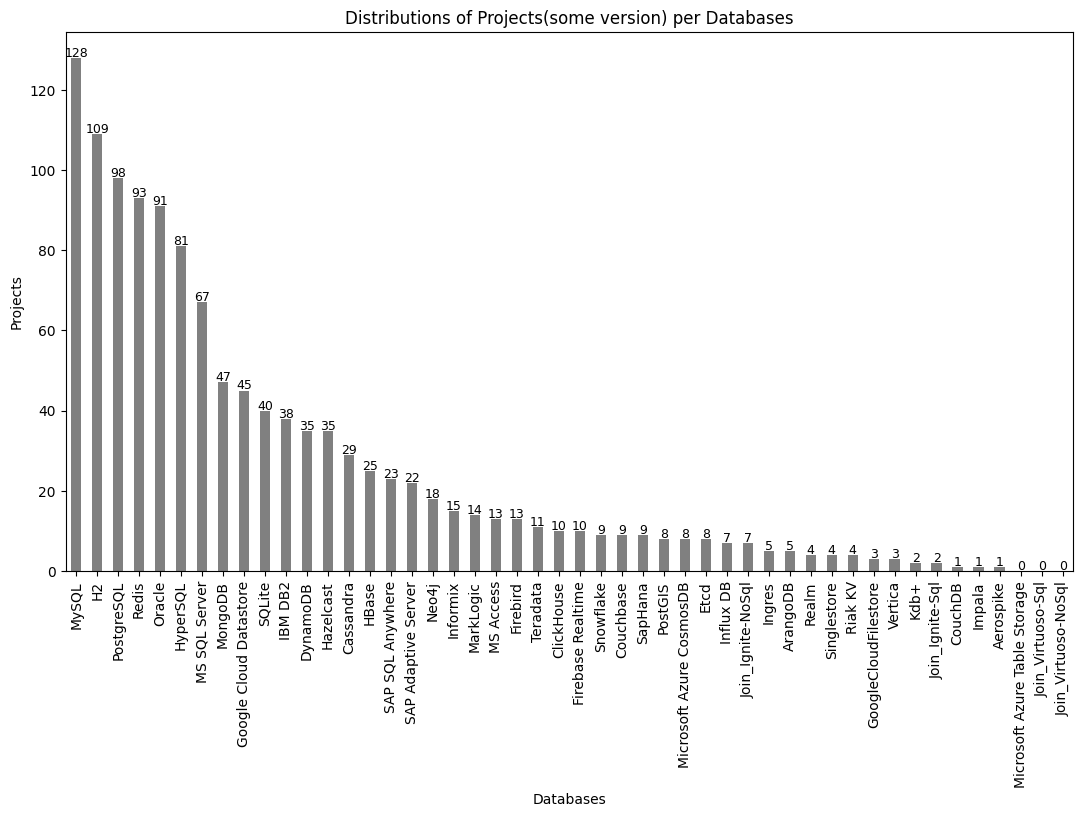

In [19]:
plt.figure(figsize=(13,7))
plot = df2.iloc[: , 1:].apply(less_commits, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects(some version) per Databases', color = 'gray')
plt.xlabel("Databases")
plt.ylabel("Projects")
#plt.show() 
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 1),textcoords='offset points')

In [58]:
df3 = pd.read_excel(RESOURCE_DIR + os.sep +'historical_join_db.xlsx', keep_default_na=False)
#df3 = pd.read_excel(RESOURCE_DIR + os.sep +'historical_join_db (1).xlsx', keep_default_na=False)
#df3['Projects'] = df3.iloc[: , 4:].sum(axis=0)
df3
#A raquel faz uma soma no final do arquivo, fazer a soma tmb. Chamar a coluna de Projects

,Databases,Primary Model,Second Model,Model,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,...,wiremock,xabber-android,yacy_search_server,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile,Projects
0,Aerospike,Key-value,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,ArangoDB,Multi-Model,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Cassandra,Wide column,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,8,8,0,0,19
3,ClickHouse,Relational,Multi-model,SQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
4,Couchbase,Document,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,CouchDB,Document,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,DynamoDB,Multi-model,,NoSQL,0,0,0,1,0,0,...,0,0,0,0,2,0,0,0,0,22
7,Etcd,Key-value,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
8,FileMaker,Relational,,SQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Firebase Realtime,Document,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [59]:

df3['Model'].replace({'SQL': 'Relational'}, regex=True, inplace=True)
df3['Model'].replace({'NoRelational': 'Non Relational'}, regex=True, inplace=True)
#df3.set_index(list(df.columns[[4]]))
#df3['Projects'] = (df3.loc[4:] > 0).count()
#print(df.iloc[:,4:]) #df3[df3.iloc [:,4:] >0].count()
df3
historical_join_db = df3.copy()


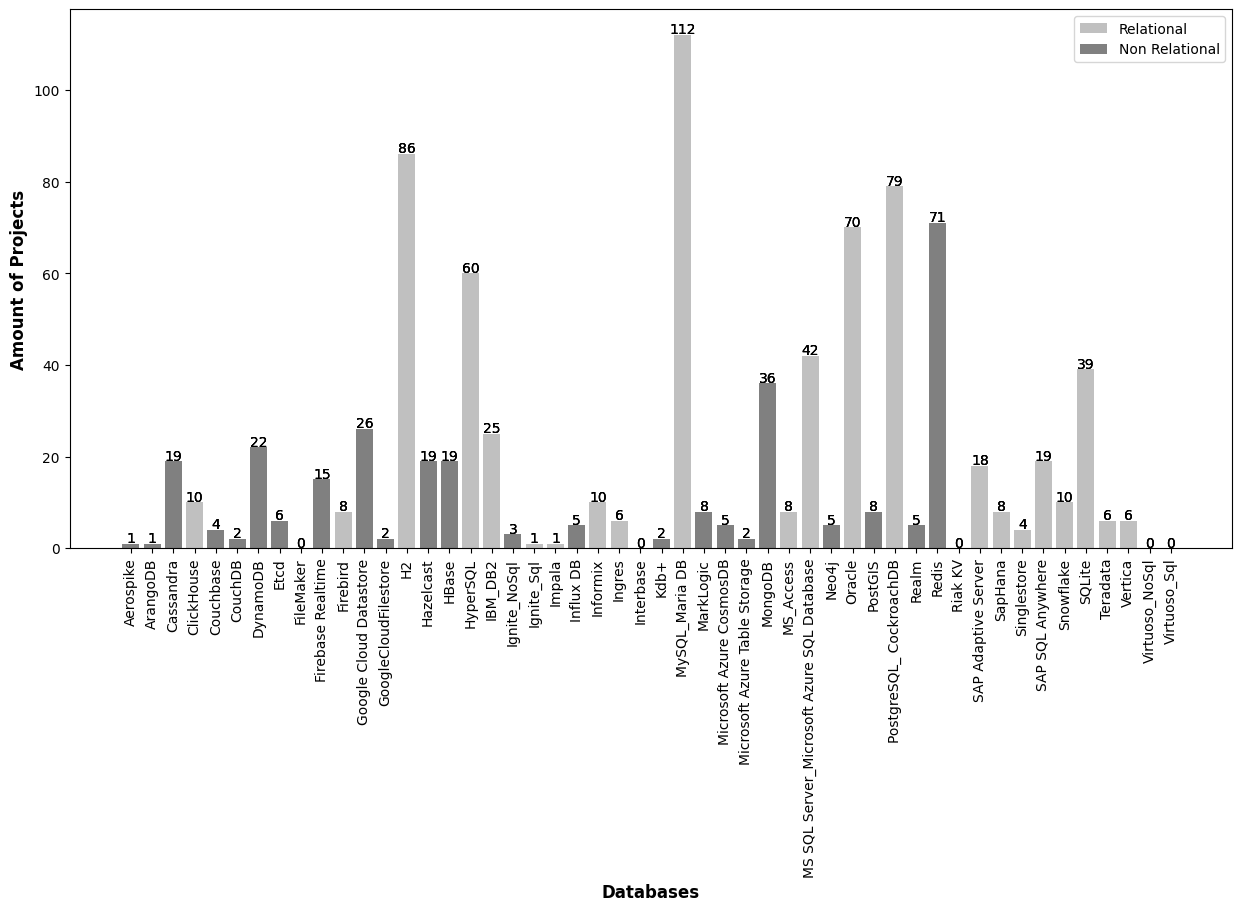

In [60]:
colors = {'Relational':'silver','Non Relational':'gray'}
c = df3['Model'].apply(lambda x: colors[x])

plt.figure(figsize=(15,7))
ax = plt.subplot(111) #specify a subplot

bars = ax.bar(df3['Databases'], df3['Projects'], color=c ) #Plot data on subplot axis
#plot = df3.plot(kind='bar', x ='Databases', y ='Projects', title = 'Distributions of Projects per Databases', color=c)
for i, j in colors.items(): #Loop over color dictionary
    ax.bar(df3['Databases'], df3['Projects'],width=0,color=j,label=i) #Plot invisible bar graph but have the legends specified

plt.xlabel("Databases", fontweight = 'bold', fontsize=12)
plt.ylabel("Amount of Projects", fontweight = 'bold', fontsize=12)
#plt.title('Distributions of Projects per Databases classify by Models')
ax.legend()
plt.xticks(rotation=90)
#plt.show()
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')

#plt.savefig(IMAGES_DIR+"/fig9.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [61]:
df.rename(columns={'MySQL_Maria DB': 'MySQL'}, inplace=True)
df.rename(columns={'PostgreSQL_ CockroachDB': 'PostgreSQL'}, inplace=True)
df.rename(columns={'MS SQL Server_Microsoft Azure SQL Database': 'MS SQL Server'}, inplace=True)

/var/folders/kc/q64njxfx5xj09h4nrxwncwbw0000gn/T/ipykernel_5230/307935619.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Amount of Projects'] = df5['Relational'] + df5['Non Relational']


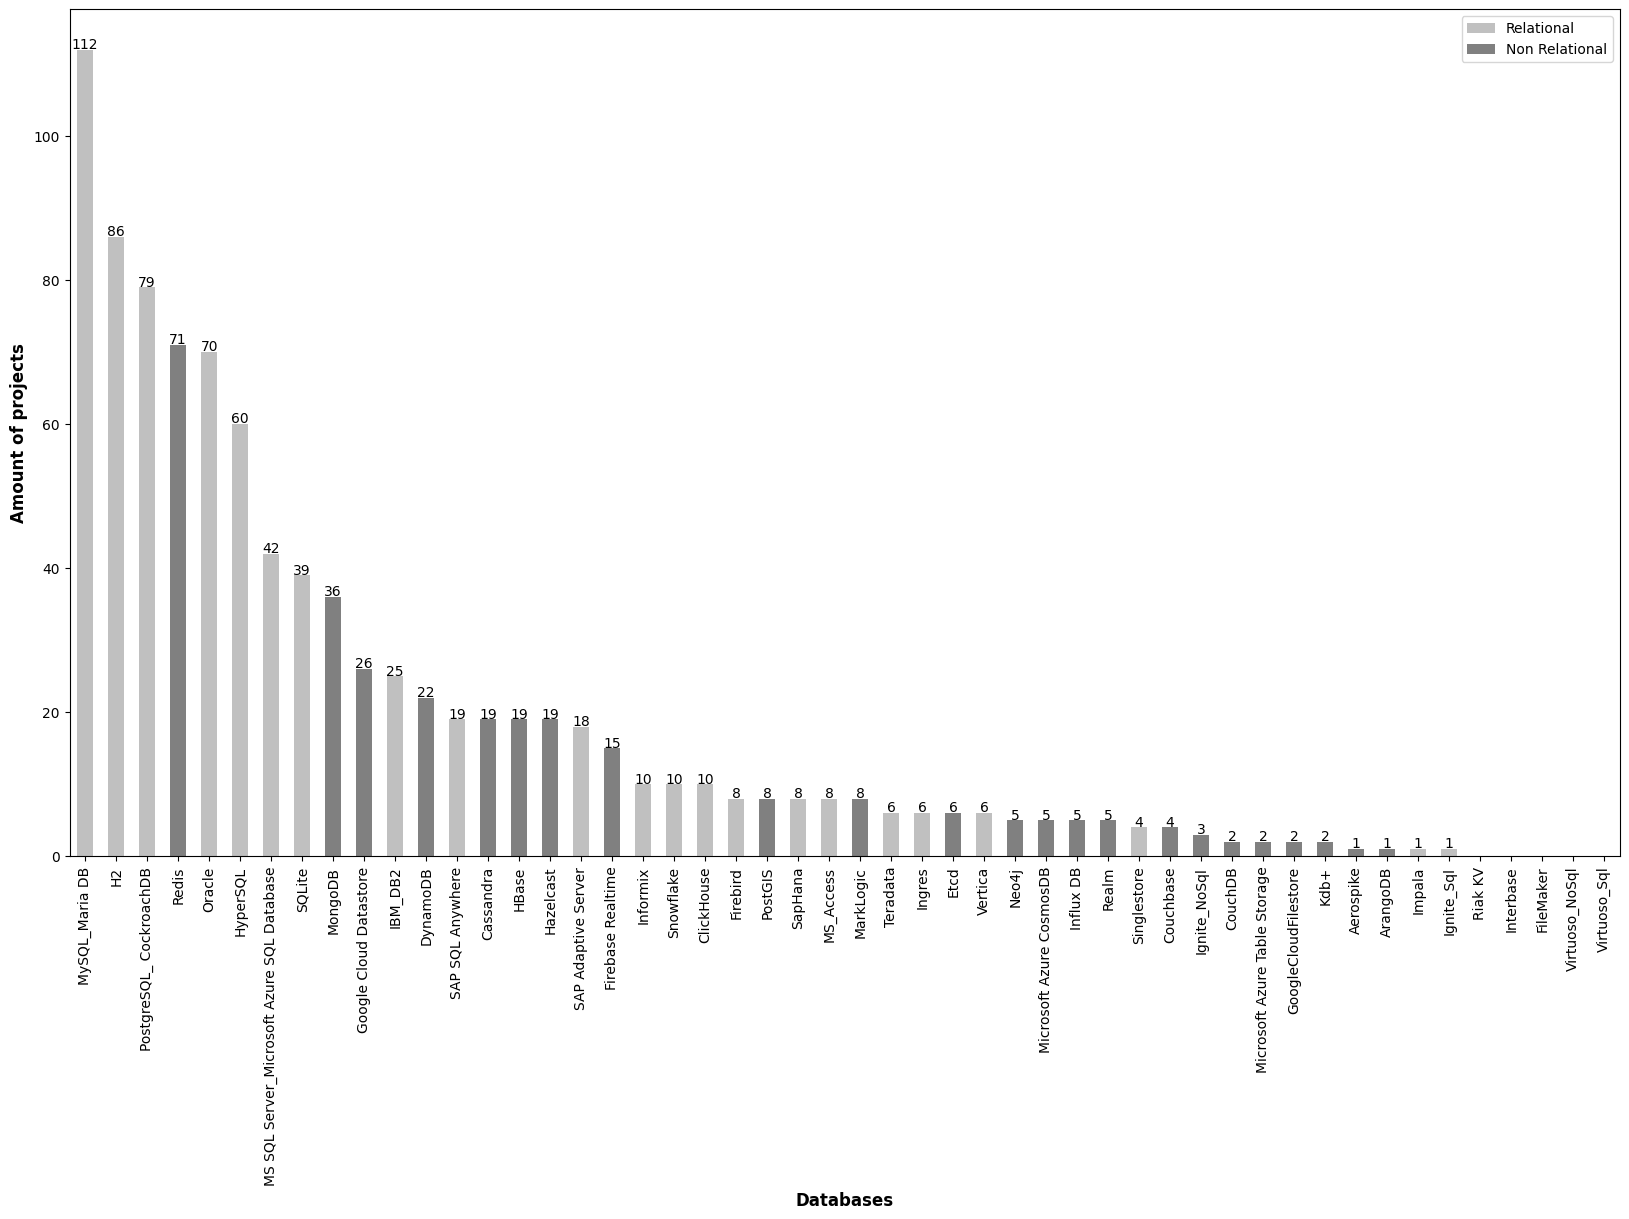

In [62]:
new_df = df3.copy()

# Supondo que seu DataFrame seja chamado df
df_grouped = new_df.groupby(['Databases'])['Projects'].sum().reset_index()

# Agrupando novamente para separar 'Relational' e 'Non_Relational'
df_grouped = new_df.groupby(['Databases', 'Model'])['Projects'].sum().reset_index()


# Criando a coluna 'Relational' e 'Non_Relational'
df_grouped['Relational'] = df_grouped.apply(lambda row: row['Projects'] if row['Model'] == 'Relational' else 0, axis=1)
df_grouped['Non Relational'] = df_grouped.apply(lambda row: row['Projects'] if row['Model'] == 'Non Relational' else 0, axis=1)

# Alterando o valor do Ignite, Virtuoso e Marklogic
#new_row = pd.DataFrame({'Databases': ['Ignite'], 'Model': ['Multi-Model'], 'Projects': [4], 'Relational': [1], 'Non Relational': [3]})
#new_row2 = pd.DataFrame({'Databases': ['Virtuoso'], 'Model': ['Multi-Model'], 'Projects': [0], 'Relational': [0], 'Non Relational': [0]})
#new_row3 = pd.DataFrame({'Databases': ['MarkLogic'], 'Model': ['Multi-Model'], 'Projects': [0], 'Relational': [0], 'Non Relational': [0]})

# Adicionando as novas linhas com Ignite, Virtuoso e MarkLogica
#df_grouped = pd.concat([df_grouped,new_row], ignore_index=True)
#df_grouped = pd.concat([df_grouped,new_row2], ignore_index=True)
#df_grouped = pd.concat([df_grouped,new_row3], ignore_index=True)


# Removendo o Ignite_sql, Ignite_NoSql...
#df_grouped = df_grouped.drop(index = [48, 49, 18, 19]) #mudar quando gerar uma nova planilha

df_grouped = df_grouped.reset_index(drop=True)


# Cirando um novo df para facilitar a criação do gráfico
df5 = df_grouped[['Databases', 'Relational', 'Non Relational']]

df5['Amount of Projects'] = df5['Relational'] + df5['Non Relational']

df5 = df5.sort_values(by='Amount of Projects', ascending=False)

# Definindo a paleta de cores
plt.rc('axes', prop_cycle=plt.cycler('color', ['silver', 'gray']))

ax = df5.plot(x='Databases', y=['Relational', 'Non Relational'], kind='bar', stacked=True, figsize=(20,11))

# Personalizando o gráfico
ax.set_xlabel("Databases", fontsize=12, fontweight = 'bold')
ax.set_ylabel("Amount of projects", fontsize=12, fontweight = 'bold')
#Incluído para mostrar os valores das barras
ax.legend()
#ticks = ['']
#plt.xticks(y, ticks)
plt.xticks(rotation=90)
#plt.show()
for i in ax.patches:
    if i.get_height() != 0:
        ax.annotate(int(i.get_height()),(i.get_x() + i.get_width() / 2, i.get_height()),
        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')

plt.savefig(IMAGES_DIR+"/fig9.pdf", format="pdf", bbox_inches="tight")
plt.show()

This dataframe shows the databases that remained and those that left. It was generated from the filter run in the Pattern counter tool with the following command: $patterncounter convert -f input_sequencial_init_in_out.txt | patterncounter count --csv -n "OutX" -v X + "~OutX" -v X + "$X" -v X >> countpatterns_OutX_notOutx_Xlastslice.csv

Out X -> Filters out the BDs that have left
$X -> Filters the Bds that remained in the last slice despite removals and reinsertions
~Out X -> Filters out the DBs that have not left.


In [25]:
df4 = pd.read_excel(HISTORICAL_DB_KEEP_OUT, keep_default_na=False) #esta parte não esta atualizada, não alterei este arquivo: HISTORICAL_DB_KEEP_OUT
len(df4)
df4

,Databases,Source,Lines
0,MySQL,OutX -v X,31
1,PostgreSQL,OutX -v X,22
2,SQLite,OutX -v X,14
3,Ehcache,OutX -v X,17
4,DynamoDB,OutX -v X,4
...,...,...,...
124,PostGIS,$X -v X,6
125,Netezza,$X -v X,3
126,OrientDB,$X -v X,3
127,Impala,$X -v X,1


In [26]:
df4['Source'].replace({'OutX -v X':'Removed'}, regex=True, inplace=True)
#df4['Source'].replace({'Removed': 'Kept'}, regex=True, inplace=True)
df4

,Databases,Source,Lines
0,MySQL,Removed,31
1,PostgreSQL,Removed,22
2,SQLite,Removed,14
3,Ehcache,Removed,17
4,DynamoDB,Removed,4
...,...,...,...
124,PostGIS,$X -v X,6
125,Netezza,$X -v X,3
126,OrientDB,$X -v X,3
127,Impala,$X -v X,1


In [27]:
#df5 = df.copy()
df5 = df4.query("Source != '$X -v X'")
df5['Source'].replace({'~Removed': 'Kept'}, regex=True, inplace=True)
df5

/var/folders/kc/q64njxfx5xj09h4nrxwncwbw0000gn/T/ipykernel_5230/2473066294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Source'].replace({'~Removed': 'Kept'}, regex=True, inplace=True)


,Databases,Source,Lines
0,MySQL,Removed,31
1,PostgreSQL,Removed,22
2,SQLite,Removed,14
3,Ehcache,Removed,17
4,DynamoDB,Removed,4
...,...,...,...
77,PostGIS,Kept,6
78,Netezza,Kept,3
79,OrientDB,Kept,3
80,Impala,Kept,1


In [28]:
df5.rename(columns={'Lines': 'Amount of Projects', 'Source':'Legend'}, inplace=True)

df5

/var/folders/kc/q64njxfx5xj09h4nrxwncwbw0000gn/T/ipykernel_5230/2910628385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.rename(columns={'Lines': 'Amount of Projects', 'Source':'Legend'}, inplace=True)


,Databases,Legend,Amount of Projects
0,MySQL,Removed,31
1,PostgreSQL,Removed,22
2,SQLite,Removed,14
3,Ehcache,Removed,17
4,DynamoDB,Removed,4
...,...,...,...
77,PostGIS,Kept,6
78,Netezza,Kept,3
79,OrientDB,Kept,3
80,Impala,Kept,1


In [29]:
df5 = df5.sort_values(['Amount of Projects'], ascending=[False])
#df5 = df5.groupby(['Databases','Legend']).mean().sort_values(['Amount of Projects',], ascending=[False])
df5

,Databases,Legend,Amount of Projects
36,MySQL,Kept,76
37,PostgreSQL,Kept,52
38,H2,Kept,51
39,Oracle,Kept,48
40,Redis,Kept,45
...,...,...,...
14,GoogleBigQuery,Removed,1
33,PostGIS,Removed,1
32,Teradata,Removed,1
31,Hive,Removed,1


In [30]:
#df5.rename(columns={'Lines': 'Amount of Projects', 'Source':'Legend'}, inplace=True)
df5['Databases'].replace({'Join_Ignite': 'Ignite'}, regex=True, inplace=True)

This graph shows the databases that remained despite removals and reinsertions and the databases that left.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

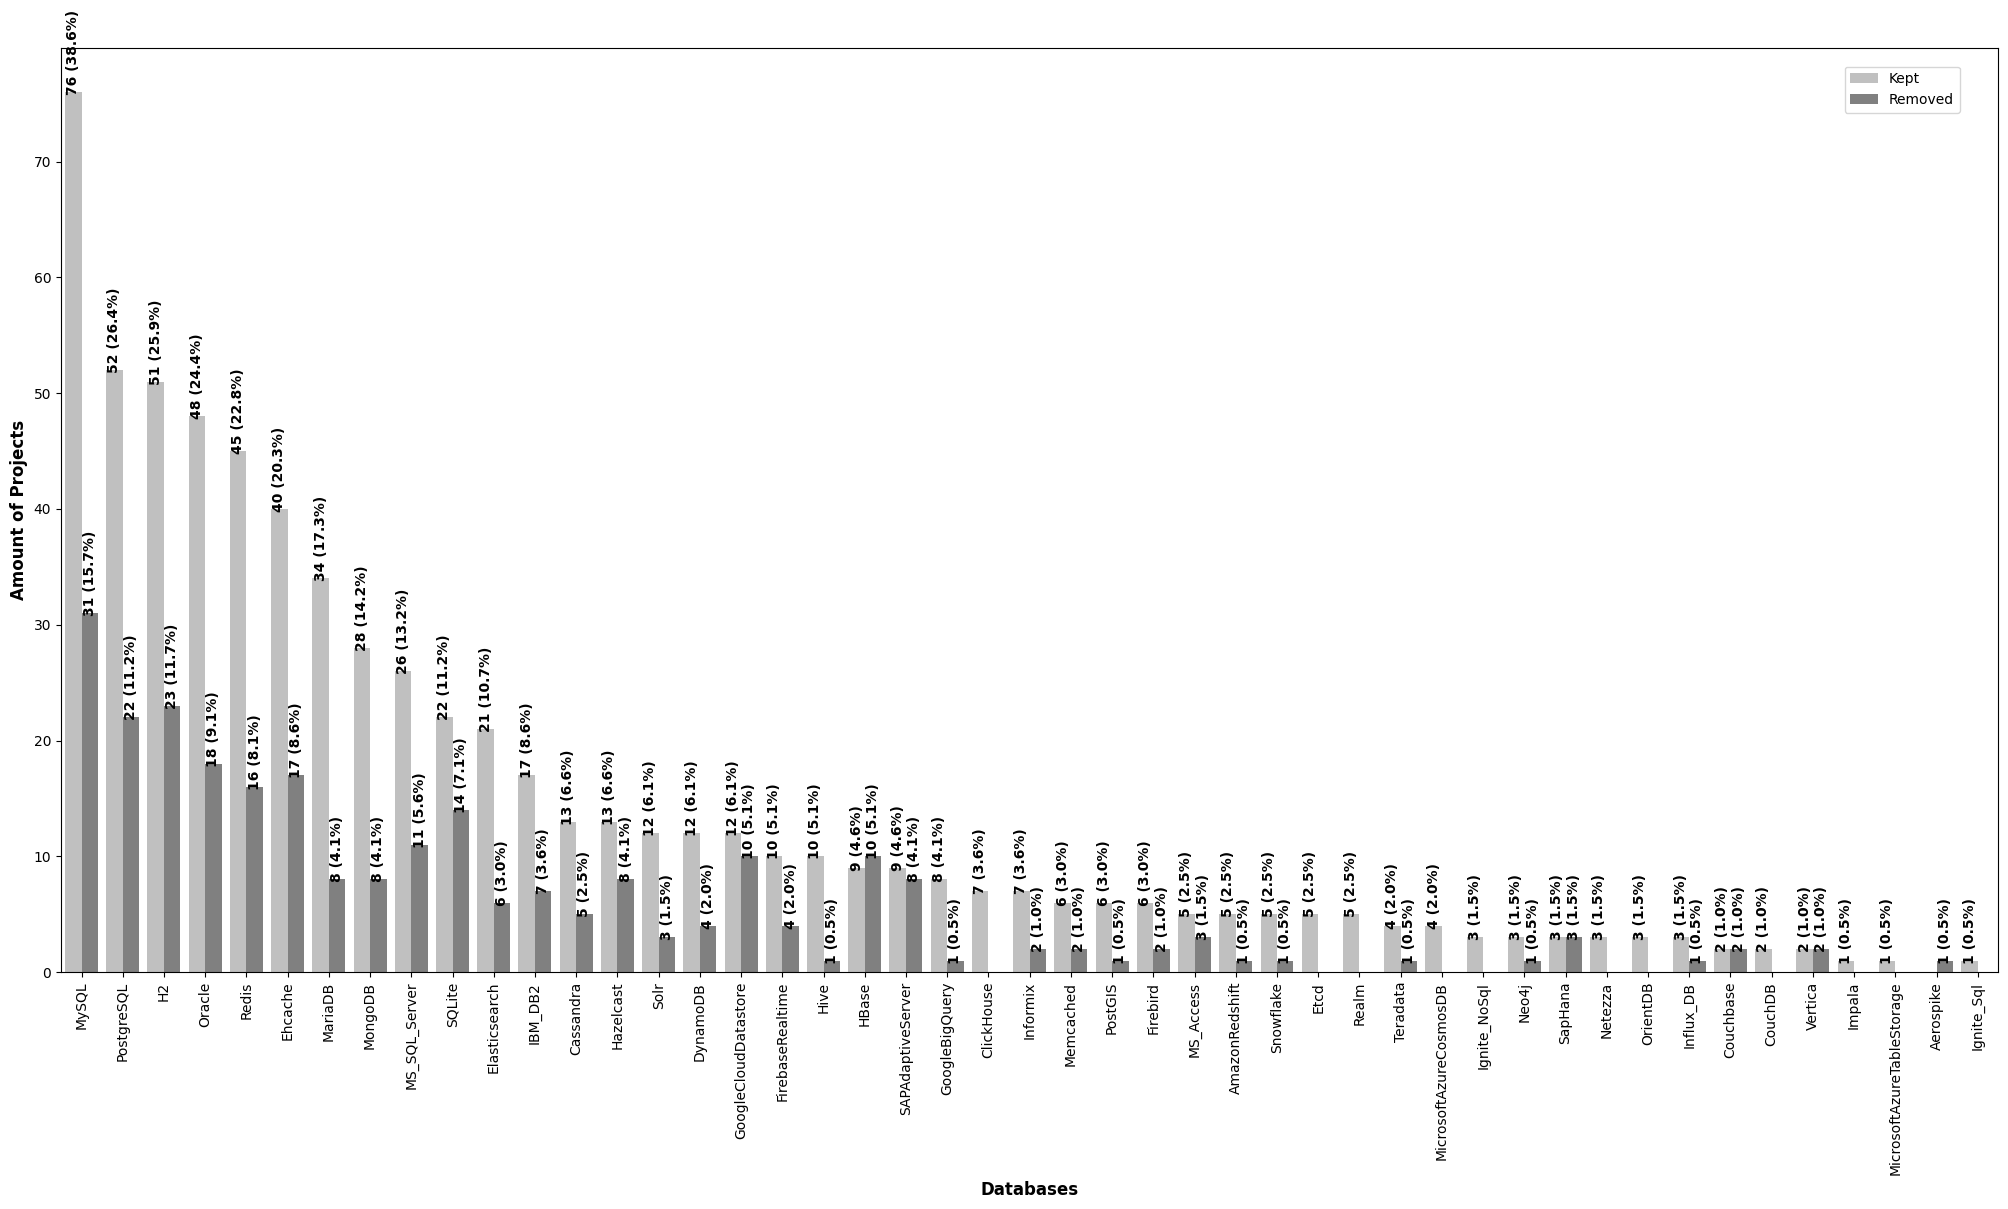

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sizeCorus = 197

plt.figure(figsize=(25, 12))

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            height = p.get_height()
            percent = 100 * height / sizeCorus
            #value = '{:.1f}'.format(percent)
            value = '{:.0f} ({:.1f}%)'.format(height, percent)
            ax.text(_x, _y, value, ha="center", fontsize = 10, fontweight='bold', rotation=90)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
        
# create grouped bar chart
p = sns.barplot(x='Databases', y='Amount of Projects', hue='Legend', data=df5, palette=["Silver", "gray"])

# add axis titles
plt.xlabel('Databases', fontsize=12, fontweight='bold')
plt.ylabel('Amount of Projects', fontsize=12, fontweight='bold')

# add values to bars
show_values_on_bars(p)

# add legend
plt.legend(bbox_to_anchor=(0.98, 0.98), loc='upper right', borderaxespad=0.)

# rotate x-axis labels
plt.xticks(rotation=90)
#plt.yticks(range(0, 30, 10), fontsize=12)

plt.savefig(IMAGES_DIR+"/fig15.pdf", format="pdf", bbox_inches="tight")
# show plot
plt.show()

In [32]:
historical_join_db

,Databases,Primary Model,Second Model,Model,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,...,wiremock,xabber-android,yacy_search_server,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile,Projects
0,Aerospike,Key-value,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
1,ArangoDB,Multi-Model,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,Cassandra,Wide column,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,8,8,0,0,110
3,ClickHouse,Relational,Multi-model,Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,55
4,Couchbase,Document,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
5,CouchDB,Document,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
6,DynamoDB,Multi-model,,Non Relational,0,0,0,1,0,0,...,0,0,0,0,2,0,0,0,0,106
7,Etcd,Key-value,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
8,FileMaker,Relational,,Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Firebase Realtime,Document,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,76


In [33]:
result_databases_models = historical_join_db
organizing_per_model = result_databases_models.groupby(['Model']).sum()
organizing_per_model = organizing_per_model.mask(organizing_per_model > 0, True)
organizing_per_model = organizing_per_model.mask(organizing_per_model == 0, False)
organizing_per_model = organizing_per_model.transpose()
organizing_per_model = organizing_per_model.drop('Projects', axis = 0)
organizing_per_model = organizing_per_model.rename(columns={'Non Relational': 'NoSQL', 'Relational':'SQL'})
organizing_per_model

Model,NoSQL,SQL
Activiti,True,True
AmazeFileManager,False,False
Android-IMSI-Catcher-Detector,True,False
Anki-Android,True,False
AntennaPod,False,False
...,...,...
zeebe,True,True
zeppelin,True,True
zipkin,True,True
zookeeper,False,True


In [34]:
relational = pd.DataFrame(data = organizing_per_model.SQL)
nonRelational = pd.DataFrame(data = organizing_per_model.NoSQL)
relational.reset_index(inplace=True)
nonRelational.reset_index(inplace=True)

relational = relational.rename(columns={'index' : 'Projects'})
nonRelational = nonRelational.rename(columns={'index' : 'Projects'})

In [35]:
models_of_database_per_project = pd.merge(relational, nonRelational, left_on='Projects', right_on='Projects')

def identify_model (row):
    if (row['SQL'] and row['NoSQL']):
        return 'Multi-Model'
    else:
        if(row['SQL']):
            return 'Relational'
        if(row['NoSQL']):
            return 'NoSQL'

models_of_database_per_project['Model'] = models_of_database_per_project.apply(lambda row: identify_model(row), axis= 1)


models_of_database_per_project[models_of_database_per_project['Model'].isnull()]
models_of_database_per_project.dropna(subset=['Model'], inplace= True)
models_of_database_per_project.to_excel('modelsTeste.xlsx')

In [36]:
from util import ANNOTATED_FILE_JAVA
annotated_java = pd.read_excel(ANNOTATED_FILE_JAVA)
characterization_of_projects = pd.merge(models_of_database_per_project, annotated_java, left_on= 'Projects', right_on='name')
characterization_of_projects.drop(characterization_of_projects.index[33], inplace= True)
characterization_of_projects

IndexError: index 33 is out of bounds for axis 0 with size 7

In [35]:
characterization_of_projects['domain'] = characterization_of_projects['domain'].str.replace('gestão pessoal', 'personal management')

In [36]:
characterization_of_projects['domain'].value_counts()

software development         39
infrastructure management    33
media                        18
monitoring                   15
hpc                          13
program analysis             12
communication                10
machine learning              9
security                      9
game                          8
network                       7
automation                    6
application container         4
collaboration                 3
file management               3
scm                           2
personal management           1
cryptocurrency                1
operating system              1
erp                           1
e-commerce                    1
Name: domain, dtype: int64

In [37]:
projects_with_db_relational = characterization_of_projects['Model'] == 'Relational'
projects_with_db_NoSQL = characterization_of_projects['Model'] == 'NoSQL'
projects_with_db_multimodel = characterization_of_projects['Model'] == "Multi-Model"

projects_with_db_relational = characterization_of_projects[projects_with_db_relational]
projects_with_db_NoSQL = characterization_of_projects[projects_with_db_NoSQL]
projects_with_db_multimodel = characterization_of_projects[projects_with_db_multimodel]

In [38]:
selecaoR = projects_with_db_relational['domain'].value_counts()
selecaoR = pd.DataFrame(data=selecaoR)
selecaoR.reset_index(inplace= True)
selecaoR.rename(columns={'domain' : 'amount'})

,index,amount
0,software development,18
1,infrastructure management,9
2,media,7
3,game,5
4,program analysis,5
5,machine learning,5
6,hpc,4
7,security,3
8,network,2
9,monitoring,2


In [39]:
selecaoNR = projects_with_db_NoSQL['domain'].value_counts()
selecaoNR = pd.DataFrame(data=selecaoNR)
selecaoNR.reset_index(inplace= True)
selecaoNR.rename(columns={'domain' : 'amount'})

,index,amount
0,media,6
1,software development,6
2,communication,4
3,infrastructure management,4
4,monitoring,2
5,network,2
6,application container,2
7,personal management,1
8,scm,1
9,automation,1


In [40]:
selecaoM = projects_with_db_multimodel['domain'].value_counts()
selecaoM = pd.DataFrame(data=selecaoM)
selecaoM.reset_index(inplace= True)
selecaoM.rename(columns={'domain' : 'amount'})

,index,amount
0,infrastructure management,20
1,software development,15
2,monitoring,11
3,hpc,8
4,security,6
5,program analysis,6
6,media,5
7,communication,5
8,automation,4
9,game,3


In [41]:
M = {'infrastructure management': 21,
 'software development': 16,
 'hpc': 9,
 'monitoring': 9,
 'program analysis': 6,
 'media': 5,
 'automation': 5,
 'security': 5,
 'communication': 5,
 'machine learning': 3,
 'game': 3,
 'network': 3,
 'collaboration': 2,
 'file management': 2,
 'erp': 2,
 'cryptocurrency': 1,
 'e-commerce': 1,
 'application container': 1}

NR = {'software development': 8,
 'media': 5,
 'communication': 5,
 'monitoring': 4,
 'infrastructure management': 4,
 'network': 3,
 'machine learning': 3,
 'automation': 3,
 'scm': 2,
 'application container': 2,
 'game': 1,
 'personal management': 1,
 'collaboration': 1,
 'program analysis': 1,
 'hpc': 1}

In [42]:
teste = pd.concat([selecaoR['index'], selecaoNR['index'], selecaoM['index']]).unique()
table = pd.DataFrame(data=teste, columns = ['domain'])
table['Relational'] = selecaoR['domain']
table['NoSQL'] = 'NaN'
table['Multi-Model'] = ''
table

,domain,Relational,NoSQL,Multi-Model
0,software development,18.0,NaN,
1,infrastructure management,9.0,NaN,
2,media,7.0,NaN,
3,game,5.0,NaN,
4,program analysis,5.0,NaN,
5,machine learning,5.0,NaN,
6,hpc,4.0,NaN,
7,security,3.0,NaN,
8,network,2.0,NaN,
9,monitoring,2.0,NaN,


In [43]:
#quando gera aqui, ele busca do DF que está construído na celula anterior, mudar a célula
table['NoSQL'] = table['domain'].map(NR)
table['Multi-Model'] = table['domain'].map(M)
table = table.fillna(0)
table = table.astype({'Relational':'int', 'NoSQL': 'int', 'Multi-Model': 'int'})
table = table.rename(columns = {'domain' : 'Domain'})
table['Total'] = table['Relational'] + table['NoSQL'] + table['Multi-Model']
sorted_table = table.sort_values(by='Total', ascending=False)

df = pd.DataFrame(table)
sorted_df = df.sort_values(by='Total', ascending=False)
sorted_df

table = sorted_df
table

,Domain,Relational,NoSQL,Multi-Model,Total
0,software development,18,8,16,42
1,infrastructure management,9,4,21,34
2,media,7,5,5,17
9,monitoring,2,4,9,15
6,hpc,4,1,9,14
4,program analysis,5,1,6,12
5,machine learning,5,3,3,11
14,communication,1,5,5,11
3,game,5,1,3,9
12,automation,1,3,5,9


In [44]:
table.drop('Total', axis=1, inplace=True)

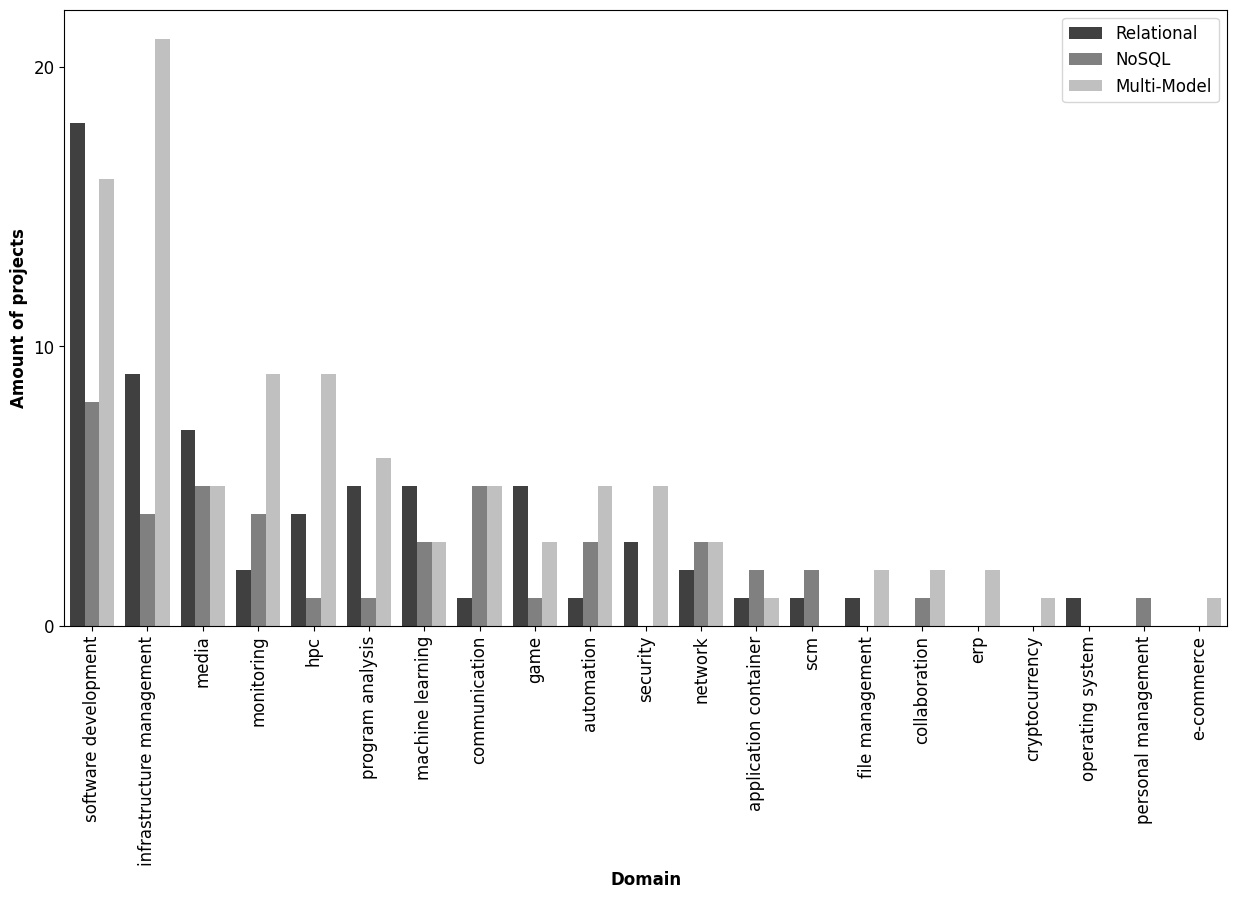

In [45]:
fig = plt.figure(figsize= (15, 8))

domain_perfil = sns.barplot(data=table.melt(id_vars='Domain', value_name='Amount of projects', var_name='Model'), x='Domain', y='Amount of projects', hue='Model', palette='gray')
domain_perfil.set_xticklabels(table['Domain'],rotation = 90, fontsize = 12)
domain_perfil.set_xlabel("Domain",fontsize = 12, fontweight = 'bold')
domain_perfil.set_ylabel("Amount of projects",fontsize = 12, fontweight = 'bold')
plt.yticks(range(0, 30, 10), fontsize=12)
domain_perfil.legend(fontsize = 12)
plt.savefig(IMAGES_DIR+"/fig11.pdf", format="pdf", bbox_inches="tight")